## Ejercicio 1

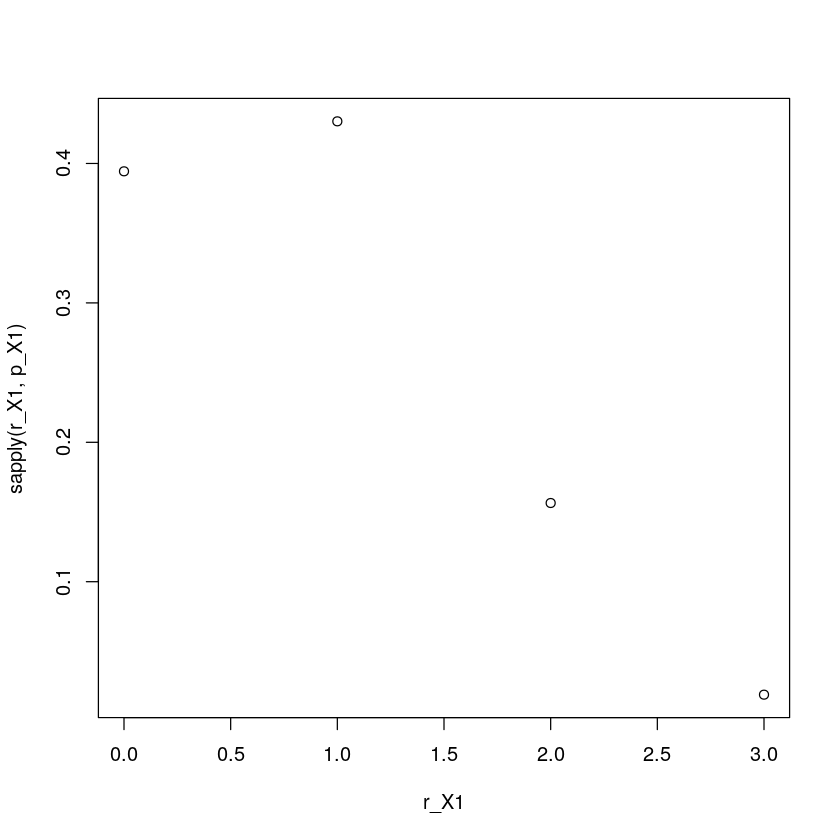

In [1]:
#a)
r_X1 = c(0:3)
p_X1 = function(x){
    ans = 0
    if (x %in% (0:3)){
        ans = ((11^(3-x))*(4^x)*(3^(0<x & x<3)))/15^3
    }
    ans
}
plot(r_X1, sapply(r_X1, p_X1))

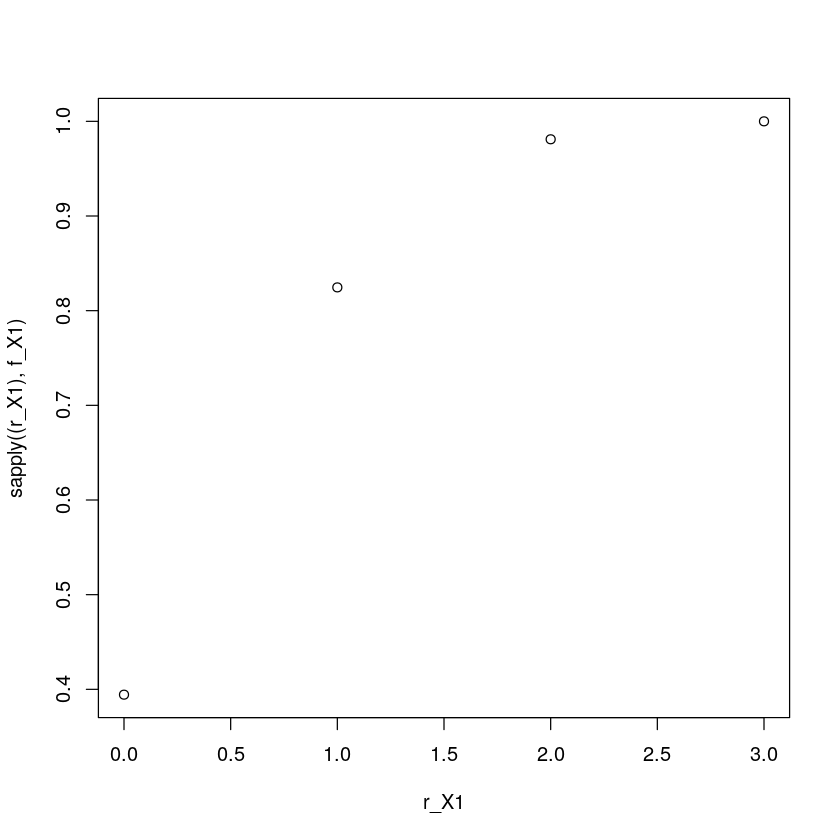

In [2]:
#c)
f_X1 = function(x){
    ans = 0
    if (x %in% (0:3)){
        ans = sum(sapply((0:x), p_X1))
    } else {
        if(x>3) ans = 1
    }
    ans
}
plot(r_X1, sapply((r_X1), f_X1))

In [3]:
articulos = c(rep('B', times=11), rep('D', times=4))
experiments = replicate(10000, sum(sample(articulos, 3)=="D"))

for (x in 0:3){
    cat("P(x=", x,"):", mean(experiments==x), "\n")
}

P(x= 0 ): 0.3625 
P(x= 1 ): 0.4903 
P(x= 2 ): 0.1378 
P(x= 3 ): 0.0094 


## Ejercicio 2
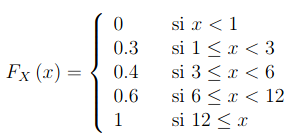

In [4]:
#c)
p_X2 = function(x){
    ans = 0
    if(x==1) ans = 0.3
    if(x==3) ans = 0.1
    if(x==6) ans = 0.2
    if(x==12) ans = 0.4
    ans
}
r_X2 = c(1,3,6,12)

replicate(5, sample(r_X2, 1, prob=sapply(r_X2, p_X2)))

[1] 12  3 12  1  6

In [5]:
#d)
experiments = replicate(1000, sample(r_X2, 1, prob=sapply(r_X2, p_X2)))

cat("P(3<X<=6):", mean(experiments>3 & experiments<=6), "\n")
cat("P(3<X<=6):", mean(experiments>=3 & experiments<=6), "\n")
cat("P(3<X<=6):", mean(experiments>=4), "\n")
cat("P(3<X<=6):", mean(experiments>=6), "\n")

P(3<X<=6): 0.219 
P(3<X<=6): 0.322 
P(3<X<=6): 0.607 
P(3<X<=6): 0.607 


## Ejercicio 3

In [12]:
f_de_distribucion = function(rango, prob_puntual, t){
    ans = 0
    if (t %in% rango){
        ans = sum(sapply((rango[1]:t), prob_puntual))
    } else {
        if(t>rango[length(rango)]) ans = 1
    }
    ans
}

for (t in r_X2){
    cat("F_X(", t, ")=", f_de_distribucion(r_X2, p_X2, t), "\n")
}

F_X( 1 )= 0.3 
F_X( 3 )= 0.4 
F_X( 6 )= 0.6 
F_X( 12 )= 1 


## Ejercicio 5

In [7]:
articulos = c(rep('B', times=11), rep('D', times=4))
experiments = replicate(10000, sum(sample(articulos, 3)=="D"))
mean(experiments)

[1] 0.8066

## Ejercicio 6

In [8]:
esperanza = function(rango, prob_puntual){
    sum(rango*sapply(rango, prob_puntual))
}

esperanza(r_X1, p_X1)

[1] 0.8

## Ejercicio 7

In [9]:
varianza = function(rango, prob_puntual){
    e_x_2 = sum((rango^2)*sapply(rango, prob_puntual))
    e_x_2 - esperanza(rango, prob_puntual)^2
}

varianza(r_X1, p_X1)

[1] 0.5866667

## Ejercicio 18
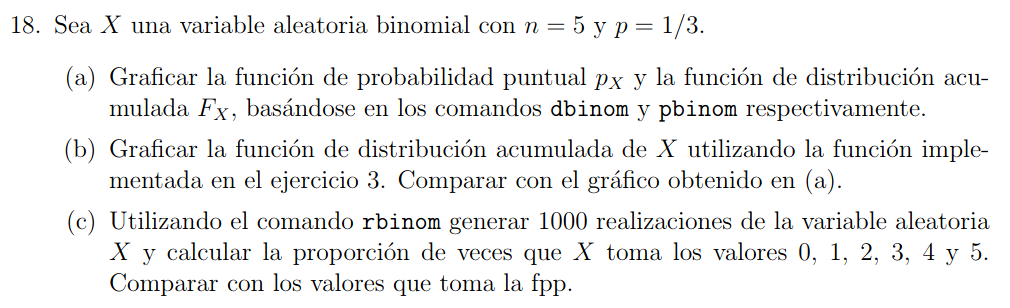

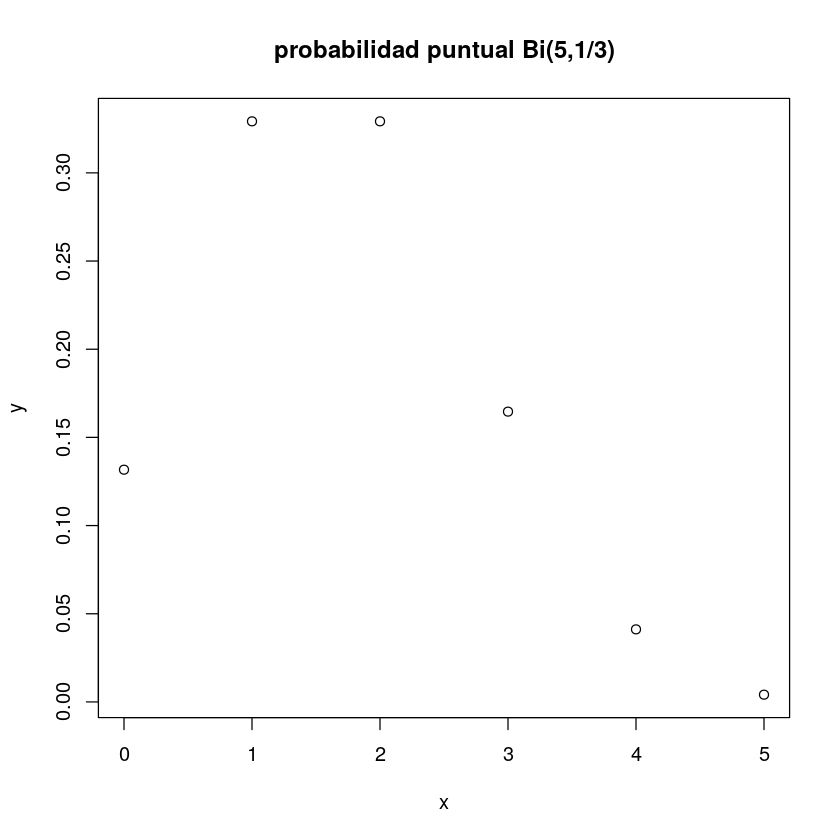

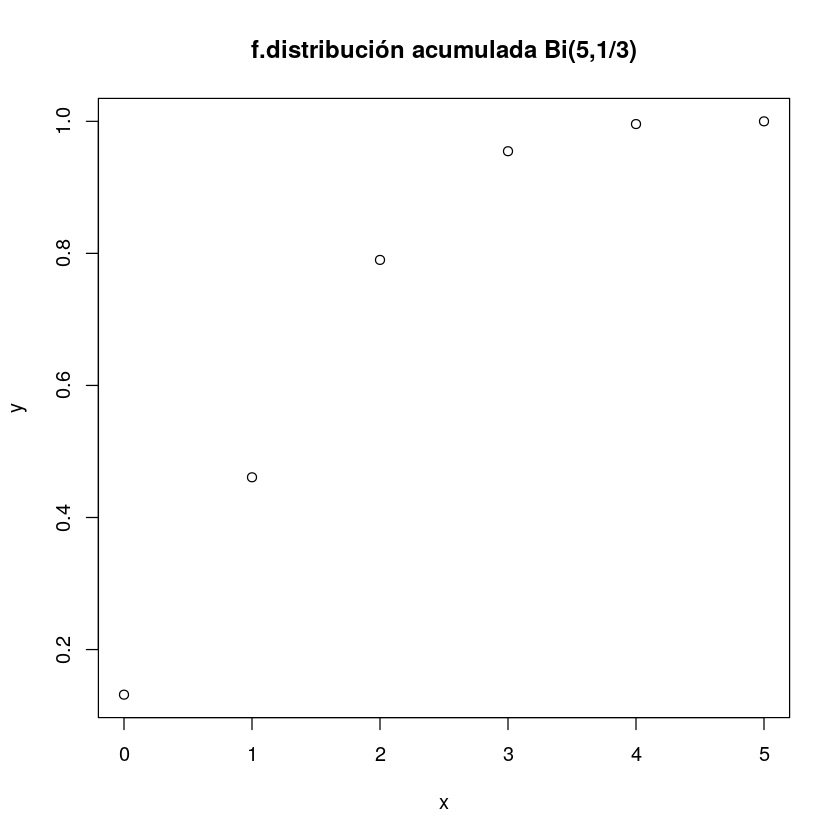

In [10]:
#a)
x = 0:5

y = dbinom(0:5, 5, 1/3)
plot(x,y, main='probabilidad puntual Bi(5,1/3)')

y = pbinom(0:5, 5, 1/3)
plot(x,y, main='f.distribución acumulada Bi(5,1/3)')

In [13]:
#b)
print("TO DO")

[1] "TO DO"


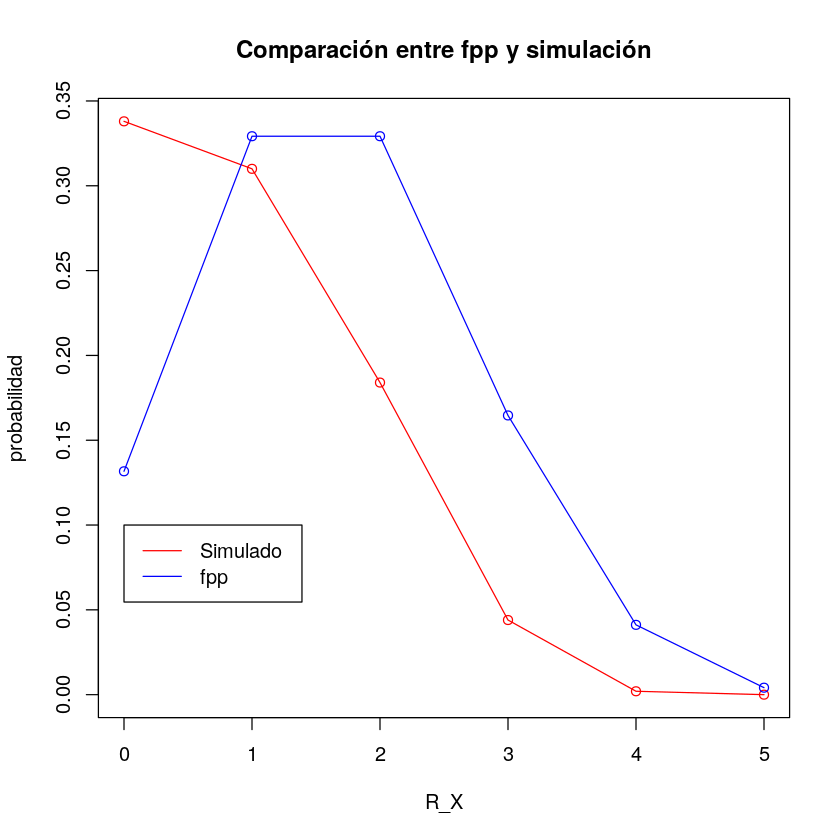

In [37]:
#c)
experiments = rbinom(1000, 5, 1/3)
simulado = c()
for(x in 0:6){
    simulado[x] = sum(experiments == x)/1000
}

x = 0:5
exacto = dbinom(0:5, 5, 1/3)

plot(x, simulado, type = "o", col = "red", main = "Comparación entre fpp y simulación",
     xlab = "R_X", ylab = "probabilidad")

lines(x, exacto, type = "o", col = "blue")

legend(0, 0.1, legend=c("Simulado", "fpp"),
       col=c("red", "blue"), lty=1)

## Ejercicio 19

In [11]:
#a) 
sum(dpois(0:4, lambda=5/2)) #fpp de Poisson
#ppois(0:4, lambda = 5/2) #fda

[1] 0.891178

In [18]:
#b) 
cat("P(X1 <= 6) = ", sum(dpois(0:6, lambda=5)), "\n")
cat("P(X1 = 6) = ", sum(dpois(6, lambda=5)), "\n")
cat("P(X1 >= 5) = ", 1 - sum(dpois(0:4, lambda=5)), "\n")
cat("P(3 <= X1 <= 6) = ", sum(dpois(3:6, lambda=5)), "\n")
cat("P(3 < X1 < 6) = ", sum(dpois(4:5, lambda=5)), "\n")
cat("P(3 <= X1 <= 6 | X1 >= 4) = ", sum(dpois(4:6, lambda=5))/ (1-sum(dpois(0:3, lambda=5))), "\n")

P(X1 <= 6) =  0.7621835 
P(X1 = 6) =  0.1462228 
P(X1 >= 5) =  0.5595067 
P(3 <= X1 <= 6) =  0.6375314 
P(3 < X1 < 6) =  0.3509347 
P(3 <= X1 <= 6 | X1 >= 4) =  0.6764287 


In [19]:
#d) estimar el número esperado de tareas que se reciben en media hora
mean(rpois(10000, lambda = 150))

[1] 149.6533